https://www.gymlibrary.dev/environments/classic_control/cart_pole/

# Import dependencies

In [ ]:
!pip install stable-baselines3[extra]

# Load the environment

In [ ]:
import os
import gymnasium as gym
from stable_baselines3 import PPO
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3.common.evaluation import evaluate_policy
from stable_baselines3.common.monitor import Monitor

In [ ]:
environmentName = 'CartPole-v1'
env = gym.make(environmentName, render_mode='human')

In [ ]:
env = Monitor(env)

In [ ]:
environmentName

In [ ]:
for episode in range(1, 11):
    state = env.reset()
    done = False
    score = 0

    while not done:
        env.render()
        action = env.action_space.sample()
        step_result = env.step(action)
        
        if len(step_result) == 4:
            n_state, reward, done, info = step_result
        elif len(step_result) == 5:
            n_state, reward, done, truncated, info = step_result
            done = done or truncated

        score += reward
    print('Episode: {} Score: {}'.format(episode, score))
env.close()

# Understandig the environment

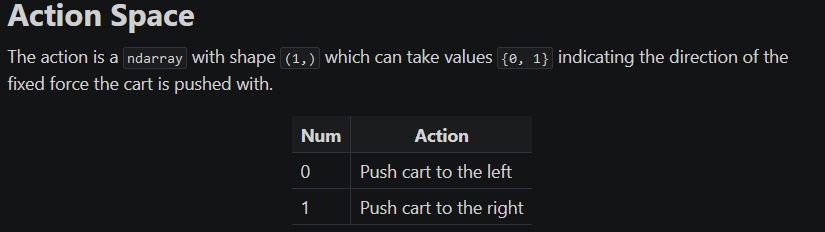

In [ ]:
env.action_space

In [ ]:
env.action_space.sample()

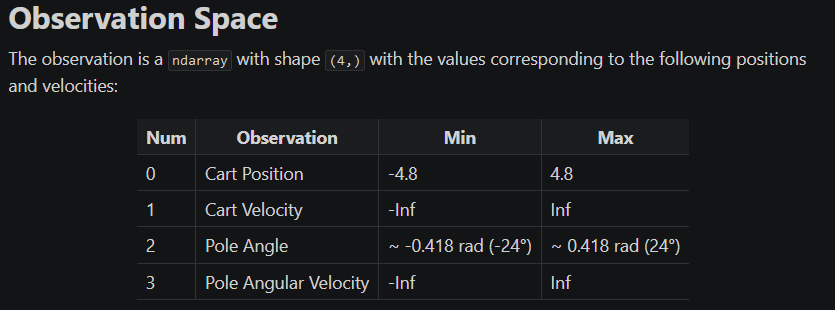

In [ ]:
env.observation_space

In [ ]:
env.observation_space.sample()

# Train an RL agent

In [ ]:
log_path = os.path.join('Training', 'Logs')

In [ ]:
log_path

In [ ]:
env = gym.make(environmentName)
env  = DummyVecEnv([lambda: env])
model = PPO('MlpPolicy', env, verbose=1, tensorboard_log=log_path)

In [ ]:
model.learn(total_timesteps=20000)

# Save and reload the model

In [ ]:
PPOPath = os.path.join('Training', 'SavedModels', 'PPO_Model_CartPole')         

In [ ]:
model.save(PPOPath)

In [ ]:
del model

In [ ]:
PPOPath

In [ ]:
model = PPO.load(PPOPath, env=env)

# Evaluate the agent

In [ ]:
mean_reward, std_reward = evaluate_policy(model, env, n_eval_episodes=10, render=True)
print(f'Mean reward: {mean_reward} ± {std_reward}')

# Test the agent

In [ ]:
for episode in range(1, 11):
    obs, _ = env.reset() if isinstance(env.reset(), tuple) else (env.reset(), None)
    done = False
    score = 0

    while not done:
        env.render()  # Ensure render is called in each step
        action, _ = model.predict(obs)
        step_result = env.step(action)
        
        if len(step_result) == 4:
            obs, reward, done, info = step_result
        elif len(step_result) == 5:
            obs, reward, done, truncated, info = step_result
            done = done or truncated

        score += reward
    print(f'Episode: {episode} Score: {score}')

env.close()